In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/SDSS_ML_P_SI_ZOHO/sdss_100k_galaxy_form_burst.csv'
data_sdss_raw = pd.read_csv(file_path, sep=",", skiprows=1, low_memory=False)

# Inspect the data
print(data_sdss_raw.head())
print(data_sdss_raw.info())
print(data_sdss_raw.isnull().sum())
print(data_sdss_raw.describe())

                 objid            specobjid          ra       dec           u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177    21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072    20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003    23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059    20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217 -9999.00000   

            g         r         i         z  modelFlux_u  ...  psfMag_z  \
0    20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1    19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2    21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3    18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
4 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...  19.02880   

       expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   cl

In [3]:
import numpy as np

data_sdss_replace = data_sdss_raw.copy()

# Replace -9999 with NaN
data_sdss_replace = data_sdss_replace.replace(-9999, np.nan)

# Verify
print(data_sdss_replace[['u','g','z','expAB_u']].head(10))
print(data_sdss_replace.head())
print(data_sdss_replace.info())
print(data_sdss_replace.isnull().sum())

          u         g         z   expAB_u
0  21.73818  20.26633  18.23833  0.099951
1  20.66761  19.32016  18.04122  0.366549
2  23.63531  21.19671  18.68396  0.050000
3  20.12374  18.41520  16.72423  0.310763
4       NaN       NaN  17.78497       NaN
5  19.47473  18.18575  16.89580  0.754158
6  20.24418  18.62780  16.97725  0.273089
7  18.46020  17.27620  16.04085  0.849475
8  18.70091  17.50793  16.54133  0.419439
9  19.88486  18.45146  16.73163  0.699929
                 objid            specobjid          ra       dec         u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217       NaN   

          g         r         i         z  modelFlux_u  ...  ps

In [4]:
data_sdss_impute = data_sdss_replace.copy()

# Import library
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_cols = data_sdss_impute.select_dtypes(include=np.number).columns

# Median imputer
median_imputer = SimpleImputer(strategy='median')
data_sdss_impute[numeric_cols] = median_imputer.fit_transform(data_sdss_impute[numeric_cols])

# Verify no more missing values
print(data_sdss_impute.head())
print(data_sdss_impute.info())
print(data_sdss_impute.isnull().sum())


          objid     specobjid          ra       dec         u         g  \
0  1.237647e+18  8.175186e+18   82.038679  0.847177  21.73818  20.26633   
1  1.237647e+18  8.175187e+18   82.138894  1.063072  20.66761  19.32016   
2  1.237647e+18  8.175187e+18   82.028510  1.104003  23.63531  21.19671   
3  1.237649e+18  3.321523e+17  198.544469 -1.097059  20.12374  18.41520   
4  1.237649e+18  3.321542e+17  198.706864 -1.046217  19.34985  18.07271   

          r         i         z  modelFlux_u  ...  psfMag_z   expAB_u  \
0  19.32409  18.64037  18.23833     2.007378  ...  19.43575  0.099951   
1  18.67888  18.24693  18.04122     5.403369  ...  18.85012  0.366549   
2  19.92297  19.31443  18.68396     0.295693  ...  19.42235  0.050000   
3  17.47202  17.05297  16.72423     8.920645  ...  18.03204  0.310763   
4  18.37762  18.13383  17.78497     0.000000  ...  19.02880  0.508736   

    expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  redshift  \
0  0.311864  0.289370  0.270588  0

In [5]:
data_sdss_nonulls = data_sdss_replace.copy()

# Drop all rows with any missing values
data_sdss_nonulls = data_sdss_nonulls.dropna()

# Verify the result
print(data_sdss_nonulls.head())
print(data_sdss_nonulls.info())
print(data_sdss_nonulls.isnull().sum())
print(data_sdss_nonulls.describe())

                 objid            specobjid          ra       dec         u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.12374   
5  1237648702973149360   332153425083000832  198.720675 -1.083876  19.47473   

          g         r         i         z  modelFlux_u  ...  psfMag_z  \
0  20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1  19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2  21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3  18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
5  18.18575  17.52763  17.14837  16.89580    16.220930  ...  18.23220   

    expAB_u   expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  \
0  0.09995

In [6]:
# Unique values in 'class'
print("Class column unique values:")
print(data_sdss_nonulls['class'].unique())

# Unique values in 'subclass'
print("\nSubclass column unique values:")
print(data_sdss_nonulls['subclass'].unique())


Class column unique values:
['GALAXY']

Subclass column unique values:
['STARFORMING' 'STARBURST']


In [7]:
# Encode 'subclass' column: STARFORMING -> 0, STARBURST -> 1
data_sdss_nonulls['subclass'] = data_sdss_nonulls['subclass'].map({'STARFORMING': 0, 'STARBURST': 1})

# Verify transformation
print(data_sdss_nonulls['subclass'].value_counts())


subclass
0    73518
1    23960
Name: count, dtype: int64


In [8]:
import numpy as np

# Make a copy
data_sdss_iqr = data_sdss_nonulls.copy()

# Identify numeric columns except ids and target
numeric_cols = data_sdss_iqr.select_dtypes(include=[np.number]).columns

cols_to_exclude = ['objid', 'specobjid', 'subclass']  # do not clip these
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Apply IQR clipping
for col in numeric_cols:
    Q1 = data_sdss_iqr[col].quantile(0.25)
    Q3 = data_sdss_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip
    data_sdss_iqr[col] = np.clip(data_sdss_iqr[col], lower_bound, upper_bound)

print("IQR outlier clipping completed.")


IQR outlier clipping completed.


In [9]:
print(data_sdss_iqr.head())
print(data_sdss_iqr.info())
print(data_sdss_iqr.isnull().sum())
print(data_sdss_iqr.describe())

                 objid            specobjid          ra       dec          u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.738180   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.667610   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  21.888454   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.123740   
5  1237648702973149360   332153425083000832  198.720675 -1.083876  19.474730   

           g          r          i         z  modelFlux_u  ...  psfMag_z  \
0  20.217987  19.314826  18.640370  18.23833     2.007378  ...  19.43575   
1  19.320160  18.678880  18.246930  18.04122     5.403369  ...  18.85012   
2  20.217987  19.314826  19.033301  18.68396     0.295693  ...  19.42235   
3  18.415200  17.472020  17.052970  16.72423     8.920645  ...  18.03204   
5  18.185750  17.527630  17.148370  16.89580    16.220930  ...  18.23220   

    expAB_u   expAB_g   expAB_r   expAB_i   expAB_z   class  s

In [10]:
data_sdss_compute = data_sdss_iqr.copy()

data_sdss_compute['u_g'] = data_sdss_compute['u'] - data_sdss_compute['g']
data_sdss_compute['g_r'] = data_sdss_compute['g'] - data_sdss_compute['r']
data_sdss_compute['r_i'] = data_sdss_compute['r'] - data_sdss_compute['i']
data_sdss_compute['i_z'] = data_sdss_compute['i'] - data_sdss_compute['z']

data_sdss_compute[['u_g','g_r','r_i','i_z']].describe()

,u_g,g_r,r_i,i_z
count,97478.000000,97478.000000,97478.000000,97478.000000
mean,1.315834,0.657341,0.356607,0.203770
std,0.324675,0.233220,0.112018,0.145828
min,-3.358604,-2.430496,-3.072641,-4.028422
25%,1.110630,0.481682,0.281525,0.125551
50%,1.292600,0.655655,0.360370,0.218915
75%,1.537370,0.849390,0.425685,0.293807
max,6.036106,4.794871,3.104496,3.605291


In [11]:
data_sdss_compute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97478 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   objid         97478 non-null  int64  
 1   specobjid     97478 non-null  uint64 
 2   ra            97478 non-null  float64
 3   dec           97478 non-null  float64
 4   u             97478 non-null  float64
 5   g             97478 non-null  float64
 6   r             97478 non-null  float64
 7   i             97478 non-null  float64
 8   z             97478 non-null  float64
 9   modelFlux_u   97478 non-null  float64
 10  modelFlux_g   97478 non-null  float64
 11  modelFlux_r   97478 non-null  float64
 12  modelFlux_i   97478 non-null  float64
 13  modelFlux_z   97478 non-null  float64
 14  petroRad_u    97478 non-null  float64
 15  petroRad_g    97478 non-null  float64
 16  petroRad_i    97478 non-null  float64
 17  petroRad_r    97478 non-null  float64
 18  petroRad_z    97478 non-null  f

In [12]:
features = [
    "u_g", "g_r", "r_i", "i_z",
    "petroR50_u", "petroR50_g", "petroR50_i", "petroR50_r", "petroR50_z",
    "expAB_g", "expAB_r", "expAB_i"
]

morph_features = data_sdss_compute[features].copy()

print(morph_features.info())
print(morph_features.head())
print(morph_features.describe().T)

<class 'pandas.core.frame.DataFrame'>
Index: 97478 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   u_g         97478 non-null  float64
 1   g_r         97478 non-null  float64
 2   r_i         97478 non-null  float64
 3   i_z         97478 non-null  float64
 4   petroR50_u  97478 non-null  float64
 5   petroR50_g  97478 non-null  float64
 6   petroR50_i  97478 non-null  float64
 7   petroR50_r  97478 non-null  float64
 8   petroR50_z  97478 non-null  float64
 9   expAB_g     97478 non-null  float64
 10  expAB_r     97478 non-null  float64
 11  expAB_i     97478 non-null  float64
dtypes: float64(12)
memory usage: 9.7 MB
None
        u_g       g_r       r_i       i_z  petroR50_u  petroR50_g  petroR50_i  \
0  1.520193  0.903161  0.674456  0.402040    1.984029    1.835038    1.438609   
1  1.347450  0.641280  0.431950  0.205710    1.069268    1.278203    1.284687   
2  1.670466  0.903161  0.281525  

In [13]:
import numpy as np

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
morph_scaled = scaler.fit_transform(morph_features)

# Convert back to DataFrame
morph_scaled_df = pd.DataFrame(morph_scaled, columns=morph_features.columns)

print("Scaled shape:", morph_scaled_df.shape)
print(morph_scaled_df.info())
print(morph_scaled_df.head())
print(morph_scaled_df.describe().T)

Scaled shape: (97478, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97478 entries, 0 to 97477
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   u_g         97478 non-null  float64
 1   g_r         97478 non-null  float64
 2   r_i         97478 non-null  float64
 3   i_z         97478 non-null  float64
 4   petroR50_u  97478 non-null  float64
 5   petroR50_g  97478 non-null  float64
 6   petroR50_i  97478 non-null  float64
 7   petroR50_r  97478 non-null  float64
 8   petroR50_z  97478 non-null  float64
 9   expAB_g     97478 non-null  float64
 10  expAB_r     97478 non-null  float64
 11  expAB_i     97478 non-null  float64
dtypes: float64(12)
memory usage: 8.9 MB
None
        u_g       g_r       r_i       i_z  petroR50_u  petroR50_g  petroR50_i  \
0  0.629428  1.054032  2.837505  1.359627   -0.494785   -0.581607   -0.825245   
1  0.097378 -0.068868  0.672600  0.013306   -1.143788   -1.027534   -0.960639   
2 

In [14]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(morph_scaled_df)

# Add to DataFrame
data_sdss_compute['cluster'] = clusters

print(np.unique(clusters, return_counts=True))


(array([0, 1, 2], dtype=int32), array([40327, 22840, 34311]))


In [15]:
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=morph_scaled_df.columns
)

cluster_centers

print("\nColor features:")
print(cluster_centers[["u_g", "g_r", "r_i", "i_z"]])

print("\nRadii features:")
print(cluster_centers[["petroR50_g", "petroR50_r", "petroR50_i"]])

print("\nAxis ratios:")
print(cluster_centers[["expAB_g", "expAB_r", "expAB_i"]])



Color features:
        u_g       g_r       r_i       i_z
0 -0.352686 -0.107824 -0.086111 -0.189005
1 -0.187762 -0.580135 -0.358463  0.064300
2  0.540172  0.513249  0.340072  0.179652

Radii features:
   petroR50_g  petroR50_r  petroR50_i
0   -0.496276   -0.481470   -0.472324
1    1.407323    1.421306    1.419360
2   -0.353041   -0.379780   -0.389250

Axis ratios:
    expAB_g   expAB_r   expAB_i
0  0.724495  0.732606  0.734167
1 -0.061919 -0.096619 -0.094036
2 -0.811542 -0.797982 -0.801539


In [16]:
cluster_label_map = {
    1: "Spiral",
    2: "Elliptical",
    0: "Irregular"
}

data_sdss_compute["morphology"] = data_sdss_compute["cluster"].map(cluster_label_map)
data_sdss_compute["morphology"].value_counts()


,count
morphology,
Irregular,40327
Elliptical,34311
Spiral,22840


In [17]:
label_encoding = {
    "Spiral": 0,
    "Elliptical": 1,
    "Irregular": 2
}

data_sdss_compute["morphology_label"] = data_sdss_compute["morphology"].map(label_encoding)


In [18]:
print(data_sdss_compute.head())
print(data_sdss_compute.info())

                 objid            specobjid          ra       dec          u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.738180   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.667610   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  21.888454   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.123740   
5  1237648702973149360   332153425083000832  198.720675 -1.083876  19.474730   

           g          r          i         z  modelFlux_u  ...  subclass  \
0  20.217987  19.314826  18.640370  18.23833     2.007378  ...         0   
1  19.320160  18.678880  18.246930  18.04122     5.403369  ...         0   
2  20.217987  19.314826  19.033301  18.68396     0.295693  ...         0   
3  18.415200  17.472020  17.052970  16.72423     8.920645  ...         0   
5  18.185750  17.527630  17.148370  16.89580    16.220930  ...         0   

   redshift  redshift_err       u_g       g_r       r_i       

In [19]:
selected_features = [
    "u_g", "g_r", "r_i", "i_z",       # color features
    "petroR50_g", "petroR50_r", "petroR50_i",   # radii
    "expAB_g", "expAB_r", "expAB_i"            # axis ratios
]


In [20]:
from sklearn.model_selection import train_test_split

X = data_sdss_compute[selected_features]
y = data_sdss_compute["morphology_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optional: Print first few rows
print("\nX_train head:")
print(X_train.head())

print("\nX_test head:")
print(X_test.head())

# Print class distribution in target variable
print("\nTarget distribution in y_train:")
print(y_train.value_counts())

print("\nTarget distribution in y_test:")
print(y_test.value_counts())


X_train shape: (77982, 10)
X_test shape: (19496, 10)
y_train shape: (77982,)
y_test shape: (19496,)

X_train head:
           u_g      g_r      r_i      i_z  petroR50_g  petroR50_r  petroR50_i  \
20416  1.33910  0.68904  0.39103  0.25219    4.090646    3.825461    3.803570   
94546  1.18565  0.51410  0.30871  0.23413    2.479516    2.433046    2.308468   
16850  1.23282  0.64029  0.39182  0.24565    2.576772    2.474809    2.462087   
62288  0.99236  0.30859  0.42826 -0.04342    1.606732    1.584657    1.499658   
42146  1.17112  0.59089  0.31449  0.22253    2.064140    2.030293    1.986083   

        expAB_g   expAB_r   expAB_i  
20416  0.565175  0.541328  0.573570  
94546  0.348892  0.353079  0.356374  
16850  0.900018  0.926690  0.920457  
62288  0.607653  0.566996  0.585665  
42146  0.870560  0.899910  0.894256  

X_test head:
            u_g       g_r       r_i       i_z  petroR50_g  petroR50_r  \
4033   1.151970  0.402390  0.249590  0.102510    1.734253    1.742795   
21443  1.6

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Overall Accuracy: 0.9795

Precision per class: [0.95549344 0.98168072 0.99159031]
Recall per class: [0.97285464 0.98396969 0.97941979]
F1-score per class: [0.96409589 0.98282387 0.98546747]


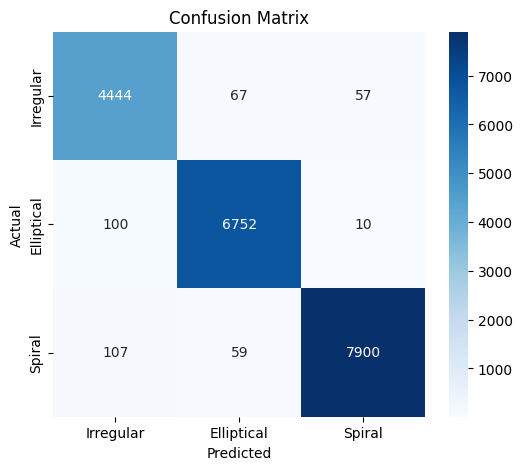


Classification Report:

              precision    recall  f1-score   support

   Irregular       0.96      0.97      0.96      4568
  Elliptical       0.98      0.98      0.98      6862
      Spiral       0.99      0.98      0.99      8066

    accuracy                           0.98     19496
   macro avg       0.98      0.98      0.98     19496
weighted avg       0.98      0.98      0.98     19496



In [21]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize Logistic Regression
# Use class_weight='balanced' because there is some class imbalance
logreg = LogisticRegression(
    multi_class='multinomial',  # for multi-class classification
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# 2. Train the model
logreg.fit(X_train, y_train)

# 3. Predict on test set
y_pred = logreg.predict(X_test)

# 4. Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)  # per class
recall = recall_score(y_test, y_pred, average=None)        # per class
f1 = f1_score(y_test, y_pred, average=None)                # per class

print(f"Overall Accuracy: {accuracy:.4f}\n")
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1-score per class:", f1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Irregular','Elliptical','Spiral'],
    yticklabels=['Irregular','Elliptical','Spiral']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics
print("\nClassification Report:\n")
print(classification_report(
    y_test, y_pred,
    target_names=['Irregular','Elliptical','Spiral']
))


Random Forest Overall Accuracy: 0.9728

Precision per class: [0.96528236 0.97206054 0.97757959]
Recall per class: [0.96169002 0.97347712 0.97842797]
F1-score per class: [0.96348284 0.97276831 0.97800359]

Classification Report:
               precision    recall  f1-score   support

   Irregular       0.97      0.96      0.96      4568
  Elliptical       0.97      0.97      0.97      6862
      Spiral       0.98      0.98      0.98      8066

    accuracy                           0.97     19496
   macro avg       0.97      0.97      0.97     19496
weighted avg       0.97      0.97      0.97     19496



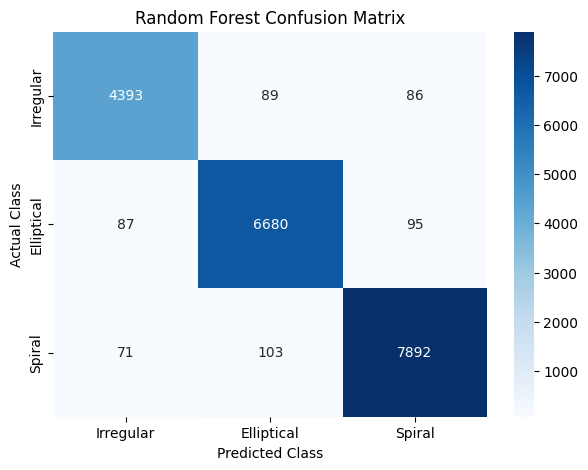

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # no limit for now
    random_state=42,
    class_weight='balanced' # handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Compute metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average=None)
recall_rf = recall_score(y_test, y_pred_rf, average=None)
f1_rf = f1_score(y_test, y_pred_rf, average=None)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=['Irregular', 'Elliptical', 'Spiral'])

# Print metrics
print(f"Random Forest Overall Accuracy: {accuracy_rf:.4f}\n")
print("Precision per class:", precision_rf)
print("Recall per class:", recall_rf)
print("F1-score per class:", f1_rf)
print("\nClassification Report:\n", class_report_rf)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Irregular', 'Elliptical', 'Spiral'], yticklabels=['Irregular', 'Elliptical', 'Spiral'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Random Forest Confusion Matrix')
plt.show()


Class weights: [1.42261384 0.9469926  0.80574068]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:05:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Overall Accuracy: 0.9758

Precision per class: [0.96172249 0.97487291 0.98477474]
Recall per class: [0.96803853 0.97814048 0.97830399]
F1-score per class: [0.96487017 0.97650396 0.9815287 ]

Classification Report:

              precision    recall  f1-score   support

   Irregular       0.96      0.97      0.96      4568
  Elliptical       0.97      0.98      0.98      6862
      Spiral       0.98      0.98      0.98      8066

    accuracy                           0.98     19496
   macro avg       0.97      0.97      0.97     19496
weighted avg       0.98      0.98      0.98     19496



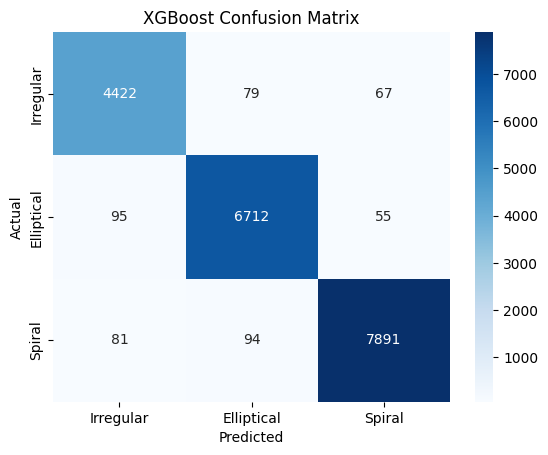

In [23]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
print("Class weights:", class_weights)

# Map sample weights
sample_weights = np.array([class_weights[label] for label in y_train])

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(classes),
    random_state=42,
    eval_metric='mlogloss',     # for monitoring
    use_label_encoder=False
)

# Train model with sample weights
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Metrics computation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print(f"XGBoost Overall Accuracy: {accuracy:.4f}")
print(f"\nPrecision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"F1-score per class: {f1}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Irregular', 'Elliptical', 'Spiral']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irregular','Elliptical','Spiral'], yticklabels=['Irregular','Elliptical','Spiral'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np

# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(
        max_iter=1000, class_weight='balanced', random_state=42
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=200, class_weight='balanced', random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )
}

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define metrics
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Run CV for each classifier
cv_results = {}

for name, clf in classifiers.items():
    print(f"\nRunning CV for {name}...")
    clf_results = {}
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring=scorer, n_jobs=-1)
        clf_results[metric_name] = (np.mean(scores), np.std(scores))
    cv_results[name] = clf_results

# Print CV results
print("\nCross-Validation Metrics (mean ± std) for all models:")
for model, metrics_dict in cv_results.items():
    print(f"\n{model}:")
    for metric, (mean_score, std_score) in metrics_dict.items():
        print(f"  {metric}: {mean_score:.4f} ± {std_score:.4f}")



Running CV for LogisticRegression...

Running CV for RandomForest...

Running CV for XGBoost...

Cross-Validation Metrics (mean ± std) for all models:

LogisticRegression:
  accuracy: 0.9780 ± 0.0007
  precision_macro: 0.9745 ± 0.0010
  recall_macro: 0.9774 ± 0.0006
  f1_macro: 0.9759 ± 0.0008

RandomForest:
  accuracy: 0.9709 ± 0.0009
  precision_macro: 0.9693 ± 0.0007
  recall_macro: 0.9694 ± 0.0013
  f1_macro: 0.9694 ± 0.0009

XGBoost:
  accuracy: 0.9743 ± 0.0010
  precision_macro: 0.9727 ± 0.0011
  recall_macro: 0.9726 ± 0.0011
  f1_macro: 0.9726 ± 0.0011


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l2'],                   # LogisticRegression supports only 'l2' with solvers 'lbfgs', 'saga', etc.
    'solver': ['lbfgs', 'saga'],         # Suitable solvers for multiclass
    'max_iter': [100, 200, 500]          # Number of iterations
}

# Initialize Logistic Regression
lr = LogisticRegression(class_weight='balanced', multi_class='multinomial', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1-score (macro): {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Irregular', 'Elliptical', 'Spiral']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}

Test Accuracy: 0.9800
Test Precision (macro): 0.9769
Test Recall (macro): 0.9790
Test F1-score (macro): 0.9779

Classification Report:

              precision    recall  f1-score   support

   Irregular       0.96      0.97      0.96      4568
  Elliptical       0.98      0.98      0.98      6862
      Spiral       0.99      0.98      0.99      8066

    accuracy                           0.98     19496
   macro avg       0.98      0.98      0.98     19496
weighted avg       0.98      0.98      0.98     19496

Confusion Matrix:
 [[4439   72   57]
 [  98 6752   12]
 [ 101   50 7915]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l2'],                   # LogisticRegression supports only 'l2' with solvers 'lbfgs', 'saga', etc.
    'solver': ['saga'],         # Suitable solvers for multiclass
    'max_iter': [200, 500, 1000]          # Number of iterations
}

# Initialize Logistic Regression
lr = LogisticRegression(class_weight='balanced', multi_class='multinomial', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1-score (macro): {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Irregular', 'Elliptical', 'Spiral']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}

Test Accuracy: 0.9800
Test Precision (macro): 0.9769
Test Recall (macro): 0.9790
Test F1-score (macro): 0.9779

Classification Report:

              precision    recall  f1-score   support

   Irregular       0.96      0.97      0.96      4568
  Elliptical       0.98      0.98      0.98      6862
      Spiral       0.99      0.98      0.99      8066

    accuracy                           0.98     19496
   macro avg       0.98      0.98      0.98     19496
weighted avg       0.98      0.98      0.98     19496

Confusion Matrix:
 [[4439   72   57]
 [  98 6752   12]
 [ 101   50 7915]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 1500],  # increase iterations
    'penalty': ['l2'],
    'solver': ['saga']
}

# Initialize Logistic Regression
lr = LogisticRegression(class_weight='balanced', multi_class='multinomial', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1-score (macro): {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Irregular', 'Elliptical', 'Spiral']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best hyperparameters found: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}

Test Accuracy: 0.9798
Test Precision (macro): 0.9766
Test Recall (macro): 0.9790
Test F1-score (macro): 0.9777

Classification Report:

              precision    recall  f1-score   support

   Irregular       0.96      0.97      0.96      4568
  Elliptical       0.98      0.98      0.98      6862
      Spiral       0.99      0.98      0.99      8066

    accuracy                           0.98     19496
   macro avg       0.98      0.98      0.98     19496
weighted avg       0.98      0.98      0.98     19496

Confusion Matrix:
 [[4443   69   56]
 [  99 6753   10]
 [ 105   55 7906]]


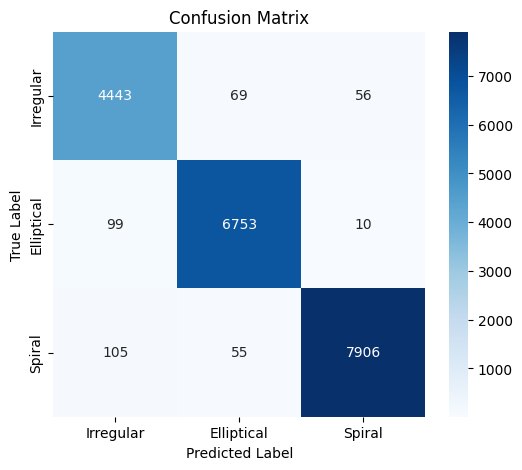

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Irregular', 'Elliptical', 'Spiral'],
            yticklabels=['Irregular', 'Elliptical', 'Spiral'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [30]:
import os
import joblib

# Model save path and name
model_path = '/content/drive/MyDrive/Stable_XAI_Saved_models/'
model_name = 'SDSS_S1_USC_LRC.pkl'

# Ensure directory exists
os.makedirs(model_path, exist_ok=True)

# Full path
full_model_path = os.path.join(model_path, model_name)

# Save the model
joblib.dump(grid_search.best_estimator_, full_model_path)

print(f"Model saved successfully at: {full_model_path}")


Model saved successfully at: /content/drive/MyDrive/Stable_XAI_Saved_models/SDSS_S1_USC_LRC.pkl
